In [1]:
import matplotlib.pyplot as plt
import numpy as np
arr = np.random.rand(30)
plt.plot(arr)
import pymnet as mn
import networkx as nx
from itertools import combinations

In [83]:
def convert_graph(M, layer, G):
    if not(layer in M.get_layers()):
        print("Layer not found")
        return
    
    for i in G.edges():
        M[i[0], i[1], layer, layer] = 1
        
    return
        
def generate_inter_conections(M, p, v):
    comb = combinations(M.get_layers(), 2)
    for lrs in comb: 
        for i in M:
            if(np.random.rand() < p):
                M[i,i, lrs[0],lrs[1]] = v
    return

def change_inter_values(M, v):
    comb = combinations(M.get_layers(), 2)
    for lrs in comb: 
        for i in M:
            if(M[i,i, lrs[0],lrs[1]] != 0):
                M[i,i, lrs[0],lrs[1]] = v
    return
            

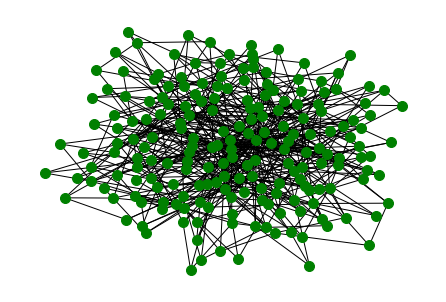

In [69]:
N = 200
av_degree = 7
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)
nx.draw(GBA, node_size=100)

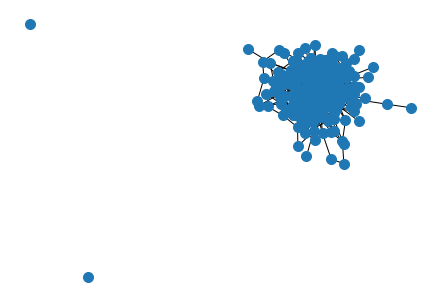

In [72]:
N = 200
av_degree = 5
p = av_degree/(N-1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
nx.draw(GER, node_size=100)

In [5]:
net = mn.MultilayerNetwork(aspects=1)
net.add_layer('a')
net.add_layer('b')
#net.add_layer('c')

In [6]:
convert_graph(net, 'a', GBA)
convert_graph(net, 'b', GER)
#convert_graph(net, 'c', GER)

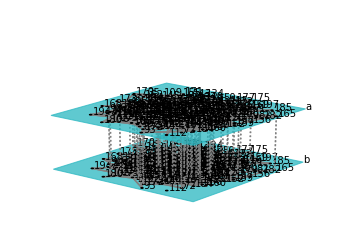

In [7]:
generate_inter_conections(net, 0.3, 0.6)
fig = mn.draw(net)

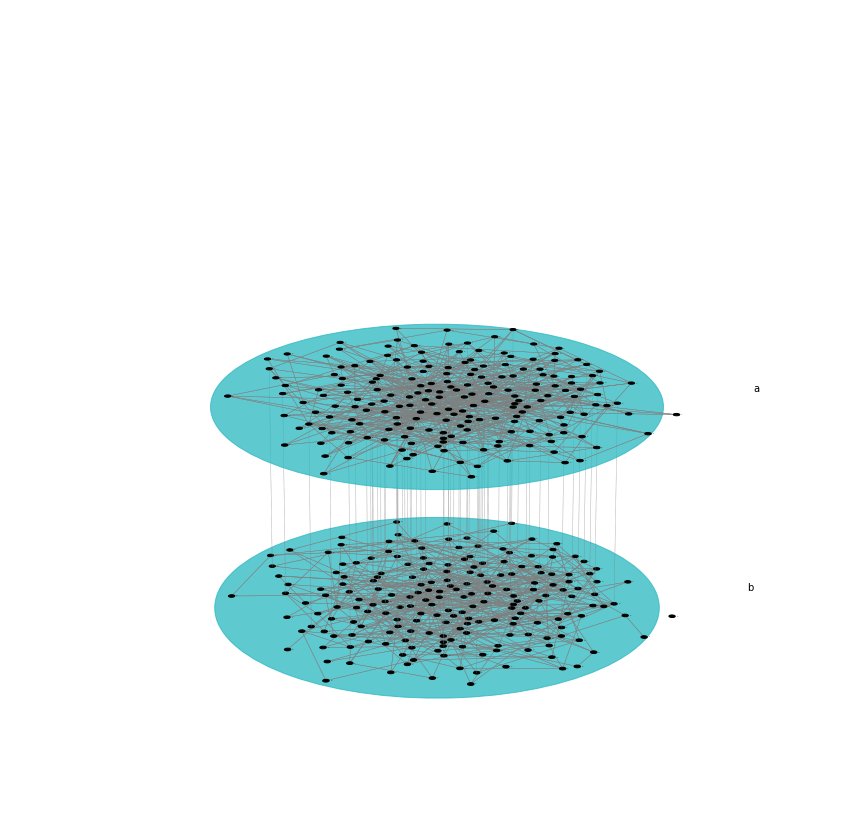

In [52]:
fig = mn.draw(net, layershape="circle", autoscale=True, figsize=(15,15), defaultNodeLabelSize=0, defaultEdgeWidth=0.4)

In [82]:
net[1, 1, "a", "b"]

0

In [9]:
# function to simulate the SIR dynamics starting from a single seed node
def SIR(G, seed, beta=0.3, mu=1):    
    def find(v, i): # function to find the positions of element i in vector v in each layer
        arr = []
        for l in v:
            pos = 0
            for x in v[l]:
                if(x == i):
                    arr.append((pos, l))
                pos = pos + 1
        return arr
    
    def count(v, i): # function to count one unic time elemets with label i in any layer
        count = 0
        for j in range(len(v[next(iter(v))])):
            flag = 0
            for k in v:
                if(v[k][j] == i):
                    flag = 1
                    
            count += flag        
        
        return count
    
    N = len(G)
    #Reactive process: SIR dynamics
    seed_nodes = seed; # seed node
    vector_states = {}
    
    
    for i in G.get_layers():
        vector_states[i] = np.zeros(N) # vector that stores the states of the vertices]
        
    for i in seed_nodes:    
        vector_states[i[0]][i[1]] = 1 # vector that stores the states
    
    
    #ninfected = len(seed_nodes)
    t = 0 # start in t= 0 
    infected = list() # this list stores the infected nodes at each step
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vR = list() # this list stores the fraction of recovered nodes
    vS = list() # this list stores the fraction of susceptible nodes
    # Reactive model simulation
    
    ninfected = count(vector_states,1)
    nrecovered = count(vector_states,2)
    vI.append(ninfected/N)
    vR.append(nrecovered/N)
    vS.append((len(G)-(ninfected+nrecovered))/N)
    vt.append(t)
    
    while ninfected > 0: # Simulate while we can find infected nodes
        infected = find(vector_states,1) # list of infected nodes

        for i in infected: # try to infect the neighbors
            #iterate in layer neighbors
            for j in G[i[0],:,i[1],i[1]]:
                if np.random.rand() < beta:
                    if(vector_states[j[1]][j[0]] != 2): # verify if the node is not recovered
                        vector_states[j[1]][j[0]] = 1
                        
            #iterate for the same person in all layers
            for j in G[i[0], i[0], i[1], :]:
                if np.random.rand() < G[i[0], j[0], i[1], j[1]]:
                    vector_states[j[1]][j[0]] = 1
                                    
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                for lay in G.get_layers():
                    vector_states[lay][k[0]] = 2
                    
        ninfected = count(vector_states,1)
        nrecovered = count(vector_states,2)
        vI.append(ninfected/N)
        vR.append(nrecovered/N)
        vS.append((len(G)-(ninfected+nrecovered))/N)
        t = t + 1
        vt.append(t)
    return vI, vS, vR, vt

In [73]:
# function to simulate the SIR dynamics starting from a single seed node
def SIRS(G, seed, beta=0.3, mu=1, eta=0.3, max_it = 300):    
    def find(v, i): # function to find the positions of element i in vector v in each layer
        arr = []
        for l in v:
            pos = 0
            for x in v[l]:
                if(x == i):
                    arr.append((pos, l))
                pos = pos + 1
        return arr
    
    def count(v, i): # function to count one unic time elemets with label i in any layer
        count = 0
        for j in range(len(v[next(iter(v))])):
            flag = 0
            for k in v:
                if(v[k][j] == i):
                    flag = 1
                    
            count += flag        
        
        return count
    
    N = len(G)
    #Reactive process: SIR dynamics
    seed_nodes = seed; # seed node
    vector_states = {}
    
    
    for i in G.get_layers():
        vector_states[i] = np.zeros(N) # vector that stores the states of the vertices]
        
    for i in seed_nodes:    
        vector_states[i[0]][i[1]] = 1 # vector that stores the states
    
    
    #ninfected = len(seed_nodes)
    t = 0 # start in t= 0 
    infected = list() # this list stores the infected nodes at each step
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vR = list() # this list stores the fraction of recovered nodes
    vS = list() # this list stores the fraction of susceptible nodes
    # Reactive model simulation
    
    ninfected = count(vector_states,1)
    nrecovered = count(vector_states,2)
    vI.append(ninfected/N)
    vR.append(nrecovered/N)
    vS.append((len(G)-(ninfected+nrecovered))/N)
    vt.append(t)
    
    while (ninfected > 0 and t<max_it): # Simulate while we can find infected nodes
        infected = find(vector_states,1) # list of infected nodes
        
        for i in infected: # try to infect the neighbors
            #iterate in layer neighbors
            for j in G[i[0],:,i[1],i[1]]:
                if np.random.rand() < beta:
                    if(vector_states[j[1]][j[0]] != 2): # verify if the node is not recovered
                        vector_states[j[1]][j[0]] = 1
                        
            #iterate for the same person in all layers
            for j in G[i[0], i[0], i[1], :]:
                if np.random.rand() < G[i[0], j[0], i[1], j[1]]:
                    vector_states[j[1]][j[0]] = 1
                                    
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                for lay in G.get_layers():
                    vector_states[lay][k[0]] = 2
                    
        recovered = find(vector_states,2)            
        for k in recovered: # try to make recovered susceptible
            if np.random.rand() < eta:
                for lay in G.get_layers():
                    vector_states[lay][k[0]] = 0
                    
        ninfected = count(vector_states,1)
        nrecovered = count(vector_states,2)
        vI.append(ninfected/N)
        vR.append(nrecovered/N)
        vS.append((len(G)-(ninfected+nrecovered))/N)
        t = t + 1
        vt.append(t)
        
    return vI, vS, vR, vt

In [74]:
# function to simulate the SIR dynamics starting from a single seed node
def SIS(G, seed, beta=0.3, mu=1, max_it = 300):    
    def find(v, i): # function to find the positions of element i in vector v in each layer
        arr = []
        for l in v:
            pos = 0
            for x in v[l]:
                if(x == i):
                    arr.append((pos, l))
                pos = pos + 1
        return arr
    
    def count(v, i): # function to count one unic time elemets with label i in any layer
        count = 0
        for j in range(len(v[next(iter(v))])):
            flag = 0
            for k in v:
                if(v[k][j] == i):
                    flag = 1
                    
            count += flag        
        
        return count
    
    N = len(G)
    #Reactive process: SIR dynamics
    seed_nodes = seed; # seed node
    vector_states = {}
    
    
    for i in G.get_layers():
        vector_states[i] = np.zeros(N) # vector that stores the states of the vertices]
        
    for i in seed_nodes:    
        vector_states[i[0]][i[1]] = 1 # vector that stores the states
    
    
    #ninfected = len(seed_nodes)
    t = 0 # start in t= 0 
    infected = list() # this list stores the infected nodes at each step
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vS = list() # this list stores the fraction of susceptible nodes
    # Reactive model simulation
    
    ninfected = count(vector_states,1)
    vI.append(ninfected/N)
    vS.append((len(G)-(ninfected))/N)
    vt.append(t)
    
    while t < max_it: # Simulate for max_it time
        infected = find(vector_states,1) # list of infected nodes
        
        for i in infected: # try to infect the neighbors
            for j in G[i[0],:,i[1],i[1]]:
                if np.random.rand() < beta:
                    vector_states[j[1]][j[0]] = 1
                        
            #iterate for the same person in all layers
            for j in G[i[0], i[0], i[1], :]:
                if np.random.rand() < G[i[0], j[0], i[1], j[1]]:
                    vector_states[j[1]][j[0]] = 1
                                    
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                for lay in G.get_layers():
                    vector_states[lay][k[0]] = 0
                    
        ninfected = count(vector_states,1)
        nrecovered = count(vector_states,2)
        vI.append(ninfected/N)
        vS.append((len(G)-(ninfected))/N)
        t = t + 1
        vt.append(t)

    return vI, vS, vt

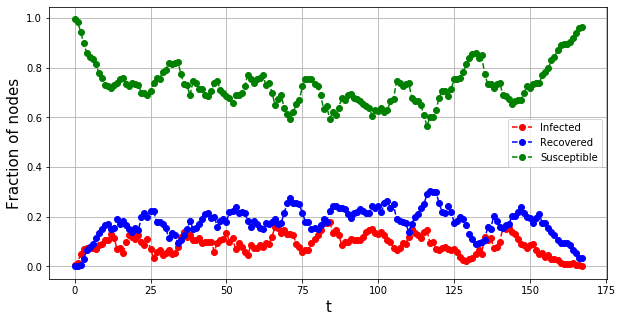

In [75]:
beta = 0.1 # Probability of infection
mu = 0.4  # Probability of recovering
eta = 0.1
seed = [('a', 0)]
vI, vS, vR, vt = SIRS(net,seed, beta, mu, eta)
    
plt.figure(figsize=(10,5))
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vR, 'bo--', label='Recovered')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

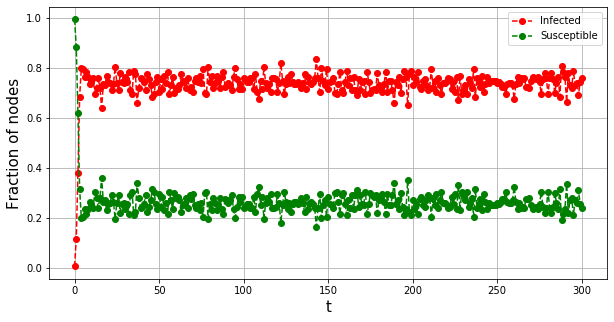

In [76]:
beta = 0.5 # Probability of infection
mu = 0.2  # Probability of recovering
seed = [('a', 0)]
vI, vS, vt = SIS(net,seed, beta, mu)
    
plt.figure(figsize=(10,5))
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

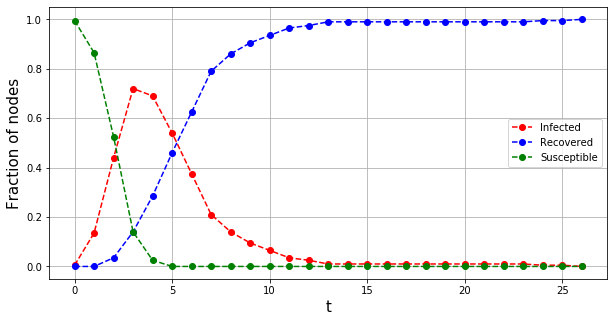

In [77]:
beta = 0.5 # Probability of infection
mu = 0.2  # Probability of recovering
seed = [('a', 0)]
vI, vS, vR, vt = SIR(net,seed, beta, mu)
    
plt.figure(figsize=(10,5))
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vR, 'bo--', label='Recovered')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show()